In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 15.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 33.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('data/hotel_bookings.csv')

In [14]:
# Mostrar las primeras filas del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
# Verificar valores nulos en el dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Preparación de datos
### Manejo de valores nulos ###
# Identificar columnas con valores nulos
# Para campos numéricos como 'children' o 'adr', considerar reemplazar los nulos con la mediana o la media.
# Para campos como 'agent' o 'company', los nulos podrían indicar reservas directas, así que podríamos crear una categoría 999 = "Directo"

In [11]:
### Manejo de outliers ###
# Identificar outliers en campos numéricos como 'lead_time', 'adr', o 'stays_in_week_nights'.
# Utilizar métodos como el rango intercuartílico (IQR) para detectar outliers.
# Decidir si recortar los outliers extremos o transformarlos (por ejemplo, usando winsorización).

In [12]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 31.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 40.5 MB/s eta 0:00:00


Número de outliers en 'lead_time': 3005
Índices de los outliers:
[     1    225    890 ... 119109 119111 119148]

Valores de los outliers:
1         737
225       394
890       460
1516      381
1672      382
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 3005, dtype: int64


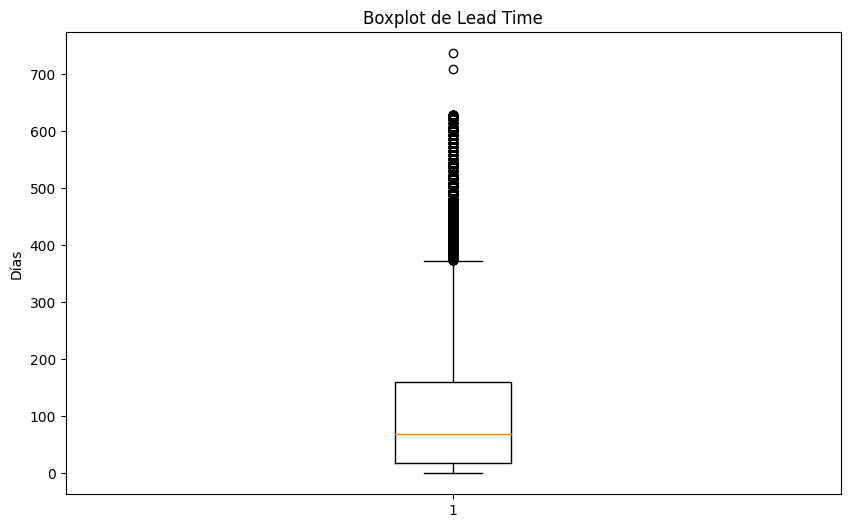

In [16]:
def identify_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    return outliers

# Aplicamos la función a la columna 'lead_time'
lead_time_outliers = identify_outliers_iqr(df['lead_time'])

print(f"Número de outliers en 'lead_time': {len(lead_time_outliers[0])}")
print("Índices de los outliers:")
print(lead_time_outliers[0])

# Para ver los valores de los outliers
print("\nValores de los outliers:")
print(df.loc[lead_time_outliers[0], 'lead_time'])

# Para visualizar la distribución y los outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.boxplot(df['lead_time'])
plt.title('Boxplot de Lead Time')
plt.ylabel('Días')
plt.show()

In [ ]:
# Para manejar los outliers:

In [17]:
def handle_outliers(df, column, method='winsorize'):
    outliers = identify_outliers_iqr(df[column])
    if method == 'winsorize':
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        df.loc[df[column] < lower_bound, column] = lower_bound
        df.loc[df[column] > upper_bound, column] = upper_bound
    elif method == 'remove':
        df = df.drop(outliers[0])
    return df

# Aplicar el manejo de outliers
df = handle_outliers(df, 'lead_time', method='winsorize')

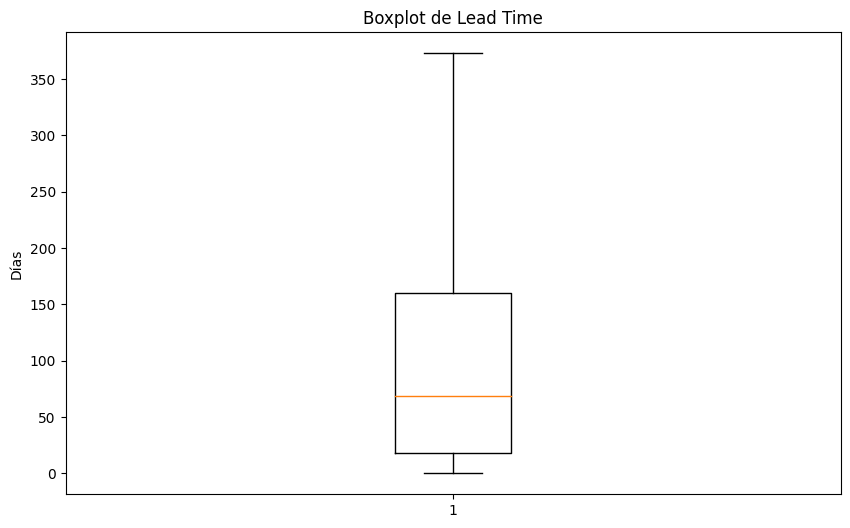

In [19]:
# Para visualizar la distribución y los outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.boxplot(df['lead_time'])
plt.title('Boxplot de Lead Time')
plt.ylabel('Días')
plt.show()

In [ ]:
### Manejo de fechas ### 
# Combinar 'arrival_date_year', 'arrival_date_month', y 'arrival_date_day_of_month' en una sola columna de fecha.
# Extraer características adicionales como día de la semana, estación del año, o si es fin de semana.

# Crear características temporales:

In [20]:
import pandas as pd
from datetime import datetime

# Crear una columna de fecha completa
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                    df['arrival_date_month'].astype(str) + '-' + 
                                    df['arrival_date_day_of_month'].astype(str))

# Día de la semana
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek

# Mes
df['arrival_month'] = df['arrival_date'].dt.month

# Temporada (ejemplo simple, ajusta según las temporadas específicas del hotel)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

df['season'] = df['arrival_month'].apply(get_season)

# Es fin de semana
df['is_weekend'] = df['arrival_day_of_week'].isin([5, 6]).astype(int)

In [21]:
# Mostrar las primeras filas del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_day_of_week,arrival_month,season,is_weekend
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2,7,Verano,0
1,Resort Hotel,0,373,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2,7,Verano,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2,7,Verano,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2,7,Verano,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,7,Verano,0


In [ ]:
### Creación de nuevas características ### 
# Calcular la duración total de la estancia sumando 'stays_in_weekend_nights' y 'stays_in_week_nights'.
# Crear una característica de 'total_guests' sumando 'adults', 'children', y 'babies'

# Generación de características agregadas

In [22]:
# Promedio de estancia
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Tasa de cancelación por tipo de cliente
cancellation_rate = df.groupby('customer_type')['is_canceled'].mean()
df['customer_type_cancellation_rate'] = df['customer_type'].map(cancellation_rate)

# Promedio de ADR por tipo de habitación
avg_adr_by_room = df.groupby('reserved_room_type')['adr'].mean()
df['avg_adr_for_room_type'] = df['reserved_room_type'].map(avg_adr_by_room)

# Total de huéspedes
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [23]:
# Mostrar las primeras filas del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date,arrival_date,arrival_day_of_week,arrival_month,season,is_weekend,total_nights,customer_type_cancellation_rate,avg_adr_for_room_type,total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,2015-07-01,2015-07-01,2,7,Verano,0,0,0.407463,160.216792,2.0
1,Resort Hotel,0,373,2015,July,27,1,0,0,2,...,2015-07-01,2015-07-01,2,7,Verano,0,0,0.407463,160.216792,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,2015-07-02,2015-07-01,2,7,Verano,0,1,0.407463,90.796658,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,2015-07-02,2015-07-01,2,7,Verano,0,1,0.407463,90.796658,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,2015-07-03,2015-07-01,2,7,Verano,0,2,0.407463,90.796658,2.0


In [ ]:
# Considerar la interacción entre variables

In [24]:
# Interacción entre tipo de habitación y temporada
df['room_season'] = df['reserved_room_type'] + '_' + df['season']

# Interacción entre tipo de cliente y temporada
df['customer_season'] = df['customer_type'] + '_' + df['season']

# Ratio de ADR respecto al promedio de ADR para ese tipo de habitación
df['adr_ratio'] = df['adr'] / df['avg_adr_for_room_type']

# Diferencia entre la fecha de reserva y la fecha de llegada (lead time en días)
df['booking_date'] = df['arrival_date'] - pd.to_timedelta(df['lead_time'], unit='D')
df['booking_to_arrival_weeks'] = (df['arrival_date'] - df['booking_date']).dt.days // 7

In [25]:
# Mostrar las primeras filas del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_weekend,total_nights,customer_type_cancellation_rate,avg_adr_for_room_type,total_guests,room_season,customer_season,adr_ratio,booking_date,booking_to_arrival_weeks
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0.407463,160.216792,2.0,C_Verano,Transient_Verano,0.000000,2014-07-24,48
1,Resort Hotel,0,373,2015,July,27,1,0,0,2,...,0,0,0.407463,160.216792,2.0,C_Verano,Transient_Verano,0.000000,2014-06-23,53
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,1,0.407463,90.796658,1.0,A_Verano,Transient_Verano,0.826022,2015-06-24,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,1,0.407463,90.796658,1.0,A_Verano,Transient_Verano,0.826022,2015-06-18,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,2,0.407463,90.796658,2.0,A_Verano,Transient_Verano,1.079335,2015-06-17,2


In [ ]:
# Generación de Características adicionales

In [26]:
# Es una reserva de última hora (por ejemplo, menos de 7 días de antelación)
df['is_last_minute'] = (df['lead_time'] < 7).astype(int)

# Número total de servicios especiales solicitados
df['total_special_requests'] = df['required_car_parking_spaces'] + df['total_of_special_requests']

# Es temporada alta (puedes definir los meses de temporada alta según el patrón del hotel)
high_season_months = [6, 7, 8, 12]  # Ejemplo: verano y diciembre
df['is_high_season'] = df['arrival_month'].isin(high_season_months).astype(int)

In [27]:
# Mostrar las primeras filas del dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,avg_adr_for_room_type,total_guests,room_season,customer_season,adr_ratio,booking_date,booking_to_arrival_weeks,is_last_minute,total_special_requests,is_high_season
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,160.216792,2.0,C_Verano,Transient_Verano,0.000000,2014-07-24,48,0,0,1
1,Resort Hotel,0,373,2015,July,27,1,0,0,2,...,160.216792,2.0,C_Verano,Transient_Verano,0.000000,2014-06-23,53,0,0,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,90.796658,1.0,A_Verano,Transient_Verano,0.826022,2015-06-24,1,0,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,90.796658,1.0,A_Verano,Transient_Verano,0.826022,2015-06-18,1,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,90.796658,2.0,A_Verano,Transient_Verano,1.079335,2015-06-17,2,0,1,1


In [29]:
# Verificar valores nulos
print(df.isnull().sum())



hotel                                   0
is_canceled                             0
lead_time                               0
arrival_date_year                       0
arrival_date_month                      0
arrival_date_week_number                0
arrival_date_day_of_month               0
stays_in_weekend_nights                 0
stays_in_week_nights                    0
adults                                  0
children                                4
babies                                  0
meal                                    0
country                               488
market_segment                          0
distribution_channel                    0
is_repeated_guest                       0
previous_cancellations                  0
previous_bookings_not_canceled          0
reserved_room_type                      0
assigned_room_type                      0
booking_changes                         0
deposit_type                            0
agent                             